# Projecting parameter uncertainty under future climate change

Import modules

In [1]:
import numpy as np
from scipy.io import netcdf as nc
import matplotlib.pyplot as plt
import xarray as xr

Parameter information

In [2]:
in_params = ['medlynslope','dleaf','kmax','fff','dint','baseflow_scalar']
npar = len(in_params)
ndim = npar

Select output variables

In [3]:
var = ["GPP", "LHF"]
nvar = len(var)

Read posterior distribution from MCMC and plot

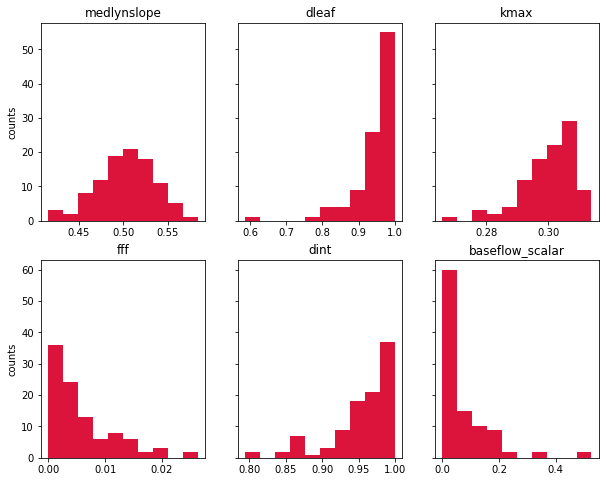

In [4]:
posterior = np.load("posterior_dists/MCMC_lastsample_2e4epochs_1e-4tol.npy")
#print(posterior.shape)
nsamples = posterior.shape[0]
fig, axes = plt.subplots(nrows=2, ncols=3, sharex=False, sharey='row', figsize=(10, 8))
labels = in_params
axes = axes.flatten()
for i in range(ndim):
    ax = axes[i]
    #ax.hist(posterior[:,i], histtype='step', linewidth='3', color='m')
    ax.hist(posterior[:,i], bins=10, color='crimson')
    ax.set_title(labels[i])

axes[0].set_ylabel("counts")
axes[3].set_ylabel("counts");
#plt.savefig("MCMC_lastsample_2e4epochs_1e-4tol_altcolor.pdf")

In [5]:
print(posterior.shape)

(100, 6)


With optimization results

In [51]:
# see NN_opt_plot.ipynb for these results
opt_params = [5.35314627e-01, 9.98124407e-01, 3.08100513e-01, 1.05168812e-04,
       9.98661100e-01, 2.25861839e-04]

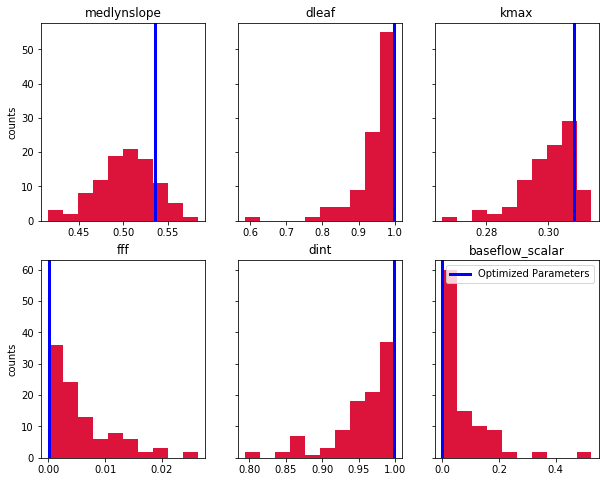

In [54]:
posterior = np.load("posterior_dists/MCMC_lastsample_2e4epochs_1e-4tol.npy")
#print(posterior.shape)
nsamples = posterior.shape[0]
fig, axes = plt.subplots(nrows=2, ncols=3, sharex=False, sharey='row', figsize=(10, 8))
labels = in_params
axes = axes.flatten()
for i in range(ndim):
    ax = axes[i]
    ax.hist(posterior[:,i], color='crimson')
    ax.axvline(x=opt_params[i], color='b', linewidth=3, label="Optimized Parameters")
    ax.set_title(labels[i])

axes[0].set_ylabel("counts")
axes[3].set_ylabel("counts")

plt.legend();

With the default values (avg over PFTs for medlynslope/dleaf)

In [5]:
# see Sensitivity spreadsheet for calculating default scaling factors
default_scalings = [0.469468382, 7.180531279, 0.5, 0.096385542, 0.6, 0.005025126]

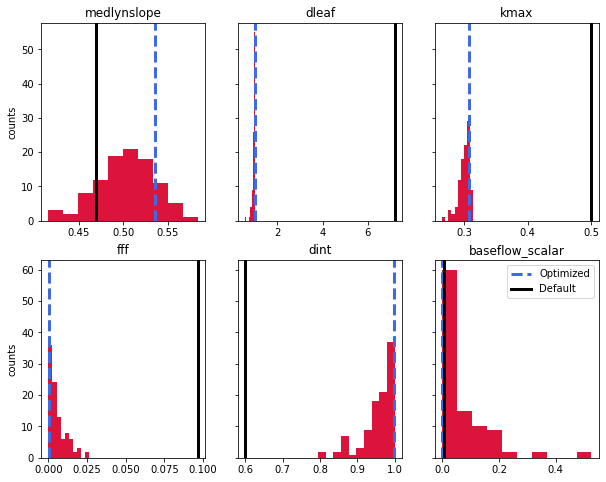

In [60]:
posterior = np.load("posterior_dists/MCMC_lastsample_2e4epochs_1e-4tol.npy")
#print(posterior.shape)
nsamples = posterior.shape[0]
fig, axes = plt.subplots(nrows=2, ncols=3, sharex=False, sharey='row', figsize=(10, 8))
labels = in_params
axes = axes.flatten()
for i in range(ndim):
    ax = axes[i]
    ax.hist(posterior[:,i], color='crimson')
    ax.axvline(x=opt_params[i], color='royalblue', linewidth=3, linestyle='dashed', label="Optimized")
    ax.axvline(x=default_scalings[i], color='k', linewidth=3, label="Default")
    ax.set_title(labels[i])

axes[0].set_ylabel("counts")
axes[3].set_ylabel("counts")

plt.legend();
#plt.savefig("MCMC_lastsample_2e4epochs_1e-4tol_altcolor_withdefault.pdf")
#plt.savefig("MCMC_lastsample_2e4epochs_1e-4tol_altcolor_withopt_anddefault.pdf")

Supress tensorflow warnings

In [10]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf

/glade/work/kdagon/miniconda/envs/ML/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/glade/work/kdagon/miniconda/envs/ML/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/glade/work/kdagon/miniconda/envs/ML/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/glade/work/kdagon/miniconda/envs/ML/lib

ML modules

In [11]:
import keras.backend as K
from keras.models import load_model

Using TensorFlow backend.


Define error metric for trained NN

In [12]:
def mean_sq_err(y_true,y_pred):
    return K.mean((y_true-y_pred)**2)

Load previously trained model

In [13]:
NN_models = [load_model("../emulators/NN_"+v+"_finalize_GM_diff.h5", 
    custom_objects={'mean_sq_err' :mean_sq_err}) for v in var]

W1110 15:05:58.046570 140285132297984 deprecation_wrapper.py:119] From /glade/work/kdagon/miniconda/envs/ML/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1110 15:05:58.653422 140285132297984 deprecation_wrapper.py:119] From /glade/work/kdagon/miniconda/envs/ML/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1110 15:05:58.781070 140285132297984 deprecation_wrapper.py:119] From /glade/work/kdagon/miniconda/envs/ML/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W1110 15:05:58.782041 140285132297984 deprecation_wrapper.py:119] From /glade/work/kdagon/miniconda/envs/ML/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:184: The name tf.ConfigProto 

Generate predictions from posterior distributions

In [14]:
post_preds = [NN_models[i].predict(posterior) for i,v in enumerate(var)]
print(post_preds[0].shape, post_preds[1].shape)

(100, 1) (100, 1)


Look at distribution of predictions

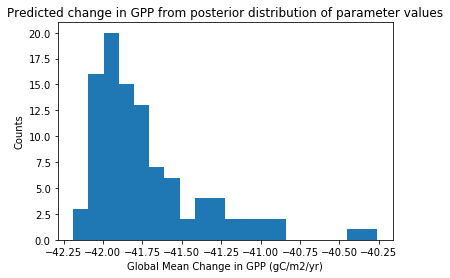

In [15]:
#GPP
plt.hist(post_preds[0], bins=20)
plt.ylabel("Counts")
plt.xlabel("Global Mean Change in GPP (gC/m2/yr)")
plt.title("Predicted change in GPP from posterior distribution of parameter values");
#plt.savefig("dist_posterior_predictions_GPP_correctobs_initopt.pdf")

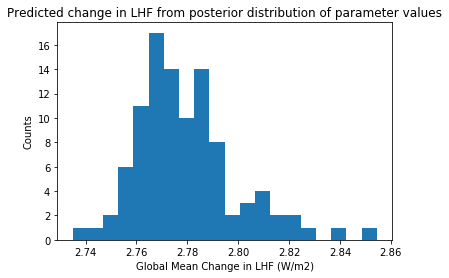

In [16]:
#LHF
plt.hist(post_preds[1], bins=20)
plt.ylabel("Counts")
plt.xlabel("Global Mean Change in LHF (W/m2)")
plt.title("Predicted change in LHF from posterior distribution of parameter values");
#plt.savefig("dist_posterior_predictions_LHF_correctobs_initopt.pdf")

Compare this distribution to PPE results for change in GPP with +2K warming

In [18]:
f=nc.netcdf_file("../outputdata/outputdata_"+var[0]+"_GM_100_diff.nc",'r', mmap=False)
f2=nc.netcdf_file("../outputdata/outputdata_"+var[1]+"_GM_100_diff.nc",'r', mmap=False)

In [19]:
X = f.variables[var[0]]
X2 = f2.variables[var[1]]
outputdata = X[:]
outputdata2 = X2[:]

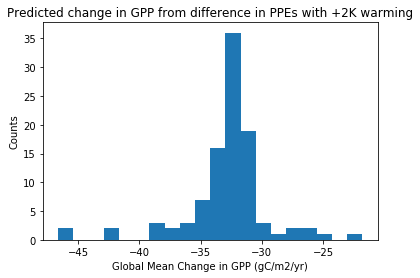

In [20]:
plt.hist(outputdata, bins=20)
plt.ylabel("Counts")
plt.xlabel("Global Mean Change in "+var[0]+" (gC/m2/yr)")
#plt.xlabel("Global Mean Change in "+var[1]+" (W/m2)")
plt.title("Predicted change in "+var[0]+" from difference in PPEs with +2K warming");
#plt.title("Predicted change in "+var[1]+" from difference in PPEs with +2K warming");
#plt.savefig("dist_PPE_2Kwarming_"+var[1]+".pdf")
#print(outputdata)

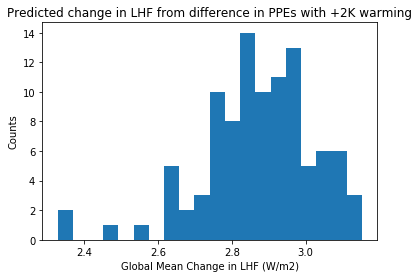

In [21]:
plt.hist(outputdata2, bins=20)
plt.ylabel("Counts")
plt.xlabel("Global Mean Change in "+var[1]+" (W/m2)")
plt.title("Predicted change in "+var[1]+" from difference in PPEs with +2K warming");
#plt.savefig("dist_PPE_2Kwarming_"+var[1]+".pdf")

Quick plot (using xarray) of sensible heat predicted change

In [22]:
f3 = xr.open_dataset("../outputdata/outputdata_FSH_GM_100_diff.nc")

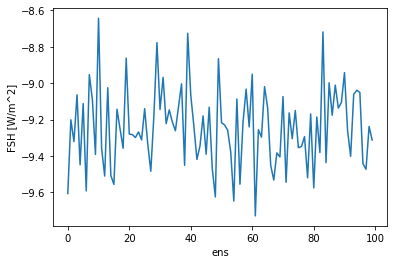

In [23]:
f3.FSH.plot();

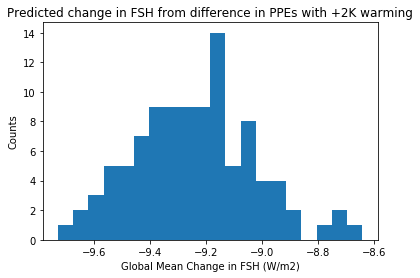

In [24]:
plt.hist(f3.FSH, bins=20)
plt.ylabel("Counts")
plt.xlabel("Global Mean Change in FSH (W/m2)")
plt.title("Predicted change in FSH from difference in PPEs with +2K warming");

Plot distributions on same plot

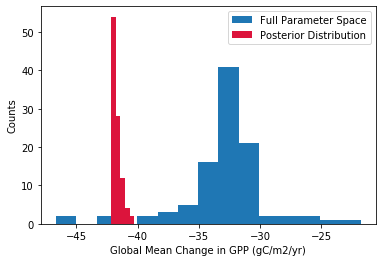

In [45]:
#plt.figure(figsize=(40,5))
plt.hist(outputdata, bins=15, label="Full Parameter Space")
plt.hist(post_preds[0], bins=5, color='crimson', label="Posterior Distribution")
plt.ylabel("Counts")
plt.xlabel("Global Mean Change in "+var[0]+" (gC/m2/yr)")
plt.legend();
#plt.savefig("future_climate_GM_PPE_posterior_GPP_diff.pdf")

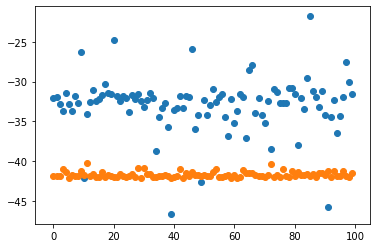

In [46]:
plt.scatter(range(len(outputdata)), outputdata)
plt.scatter(range(len(post_preds[0])), post_preds[0])

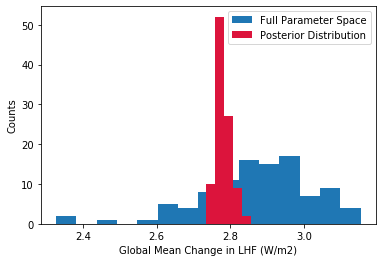

In [47]:
plt.hist(outputdata2, bins=15, label="Full Parameter Space")
plt.hist(post_preds[1], bins=5, color='crimson', label="Posterior Distribution")
plt.ylabel("Counts")
plt.xlabel("Global Mean Change in LHF (W/m2)")
plt.legend();
#plt.title("Predicted change in LHF from posterior distribution of parameter values");
#plt.savefig("future_climate_GM_PPE_posterior_LHF_diff.pdf")